## Step 2 - Ploting

### Importing needed packages

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading and preparing the datasets

In [27]:
tp2m = pd.read_csv("tp2m_med.csv")
DAT = pd.read_csv("tp2m_med.csv")
enso = pd.read_csv("enso_idx.csv")
prec = pd.read_csv("prec.csv")

DAT['date'] = [str(dt)[0:6] for dt in DAT['date']]
enso['date'] = [str(dt)[0:6] for dt in enso['date']]
prec['date'] = [str(dt)[0:6] for dt in prec['date']]
tp2m['date'] = [str(dt)[0:6] for dt in tp2m['date']]

DAT = pd.DataFrame(DAT.groupby('date')['tp2m_med'].mean())
enso = pd.DataFrame(enso.groupby('date')['enso_idx'].mean())
prec = pd.DataFrame(prec.groupby('date')['prec'].mean())
tp2m = pd.DataFrame(tp2m.groupby('date')['tp2m_med'].mean())

DAT = DAT.merge(enso, how='left', left_index=True, right_index=True).merge(prec, how='left', left_index=True, right_index=True)

### Ploting ENSO index Time Series

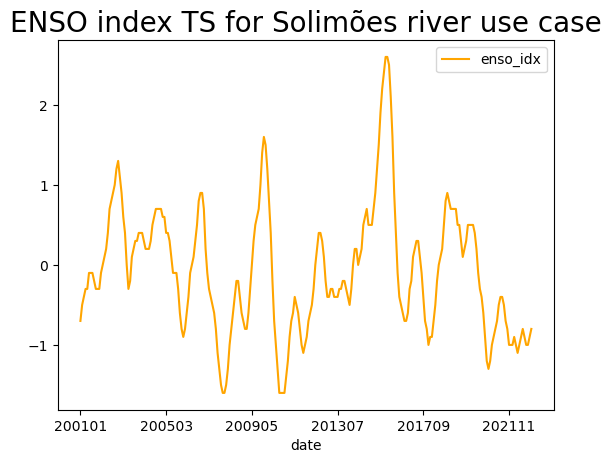

In [31]:
enso.plot(color='orange')
plt.title('ENSO index TS for Solimões river use case', fontsize=20);

Data source: https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

### Ploting rain index Time Series

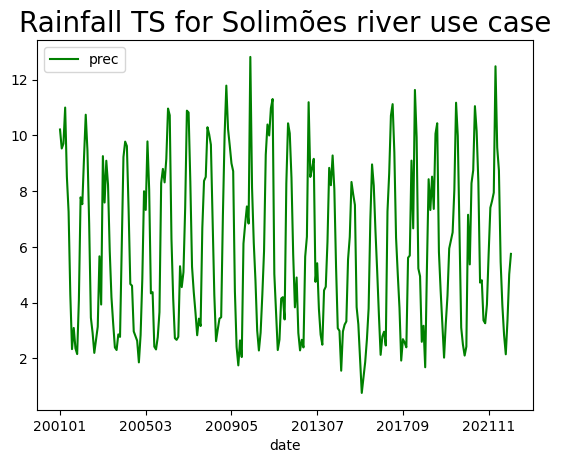

In [32]:
prec.plot(color='green')
plt.title('Rainfall TS for Solimões river use case', fontsize=20);

Data Source: Rozante, J. R., D. S. Moreira, L. G. G. de Goncalves, and D. A. Vila, 2010: Combining TRMM and Surface Observations of Precipitation: Technique and Validation over South America. Wea. Forecasting, 25, 885–894, https://doi.org/10.1175/2010WAF2222325.1.

### Ploting averaged temp at 2m Time Series

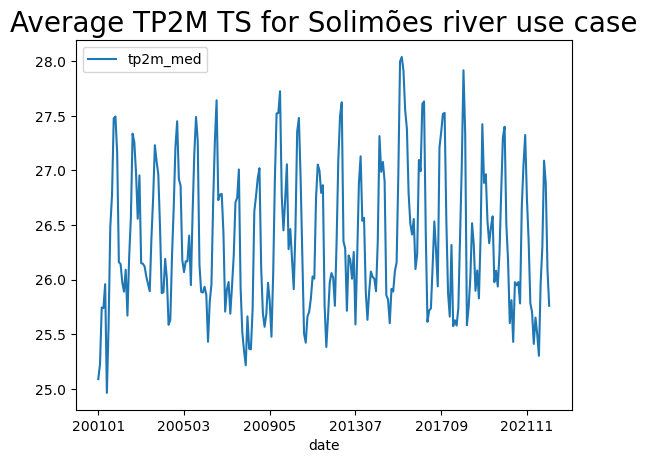

In [30]:
tp2m.plot()
plt.title('Average TP2M TS for Solimões river use case', fontsize=20);

Data source: : Rozante, J. R., Ramirez,E., & Fernandes, A. d. A. (2021). A newly developed South American Mapping of Temperature with estimated lapse rate corrections. International Journal of Climatology, 1–18. https://doi.org/10.1002/joc.7356

### Normalizing data

In [16]:
# copy the data 
DAT_z_scaled = DAT.copy() 
# apply normalization techniques 
for column in DAT_z_scaled.columns: 
    DAT_z_scaled[column] = (DAT_z_scaled[column] -
                           DAT_z_scaled[column].mean()) / DAT_z_scaled[column].std()  

### Multiline plot

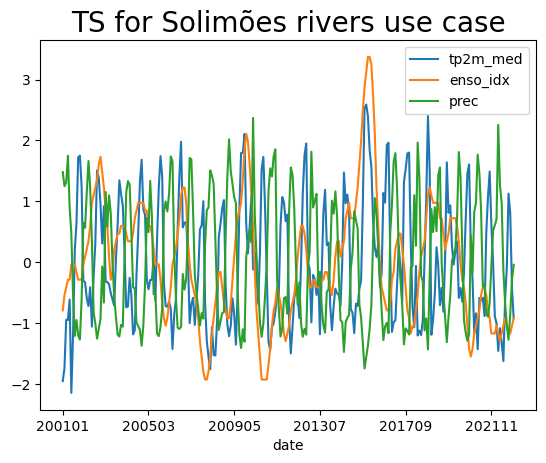

In [17]:
DAT_z_scaled.plot()
plt.title('TS for Solimões river use case', fontsize=20);

### Checking correlation with Scatterplot of Matrix (SPLOM)

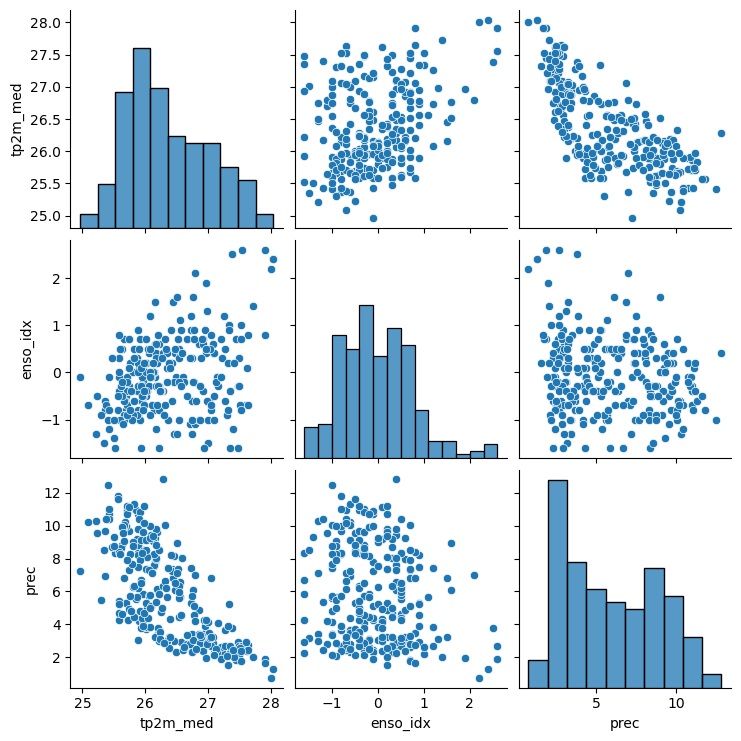

In [18]:
import seaborn as sns
columns = ['tp2m_med', 'enso_idx', 'prec']
sns.pairplot(DAT[columns]);